In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
wine = pd.read_csv('redwine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

bar plot

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

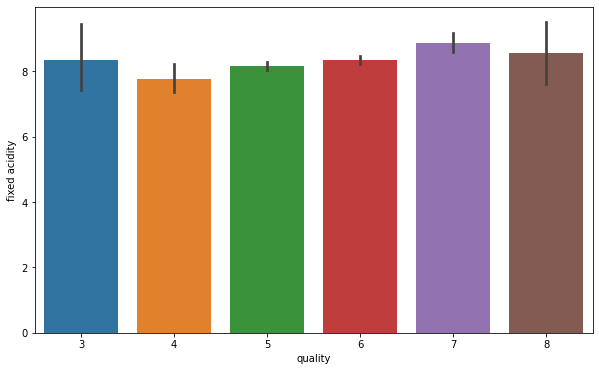

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

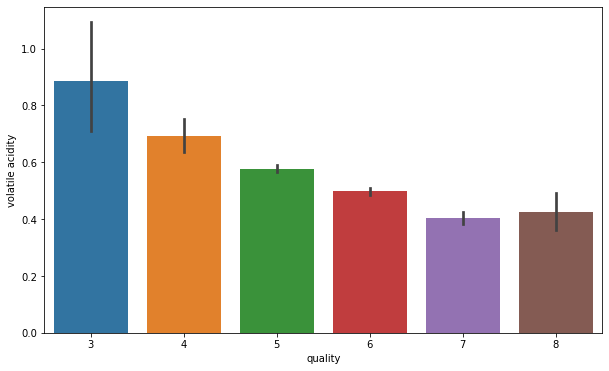

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

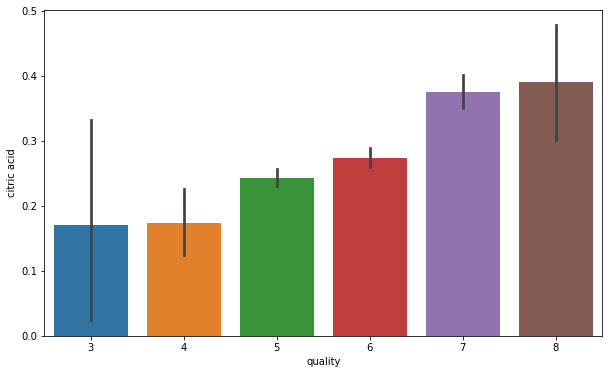

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

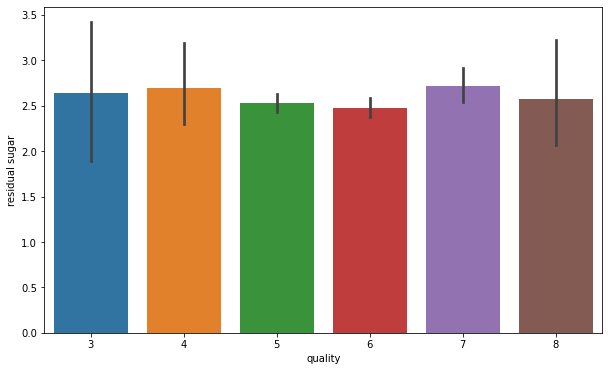

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

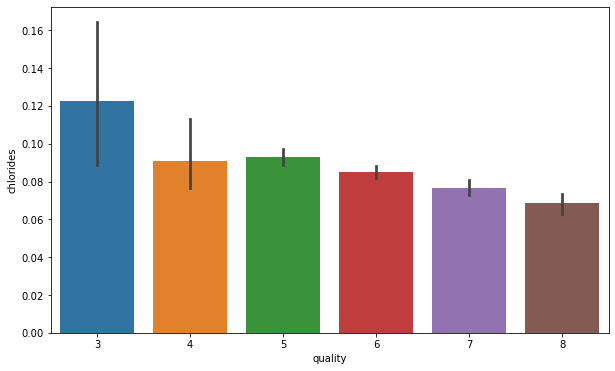

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

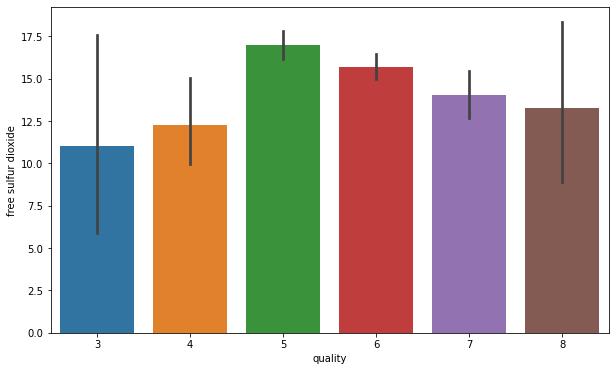

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

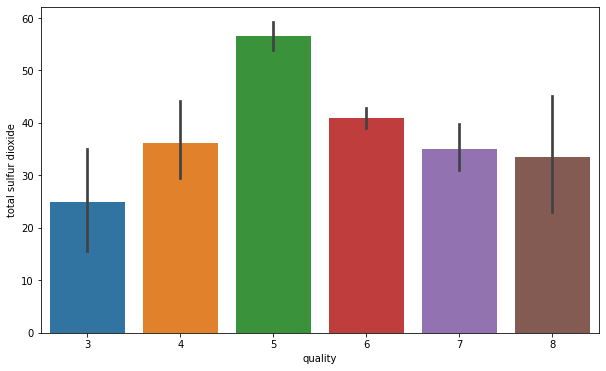

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

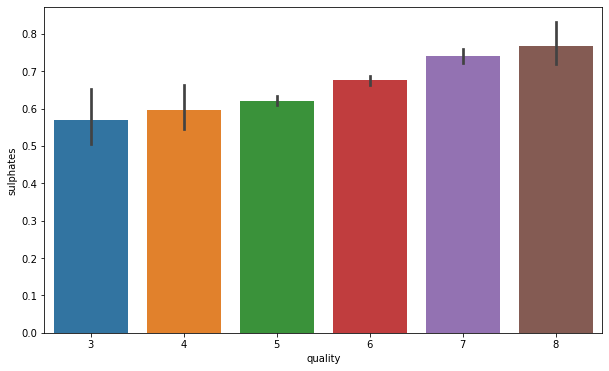

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

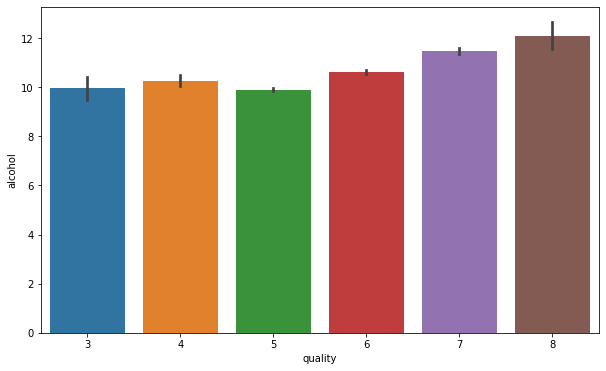

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

<AxesSubplot:xlabel='fixed acidity'>

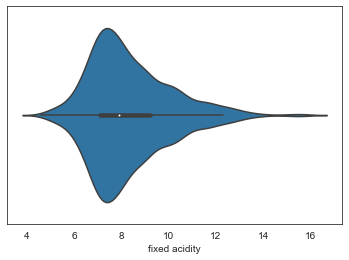

In [15]:
sns.set_style('white')
sns.violinplot(x='fixed acidity',data=wine)

<AxesSubplot:xlabel='volatile acidity'>

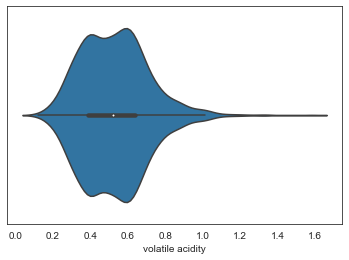

In [16]:
sns.set_style('white')
sns.violinplot(x='volatile acidity',data=wine)

<AxesSubplot:xlabel='citric acid'>

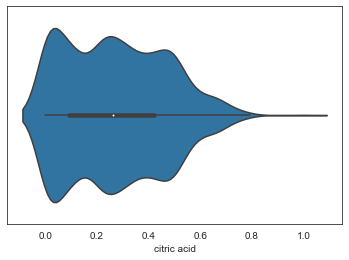

In [17]:
sns.set_style('white')
sns.violinplot(x='citric acid',data=wine)

<AxesSubplot:xlabel='residual sugar'>

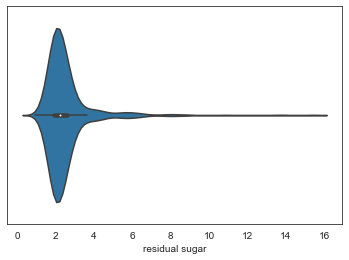

In [19]:
sns.set_style('white')
sns.violinplot(x='residual sugar',data=wine)

<AxesSubplot:xlabel='chlorides'>

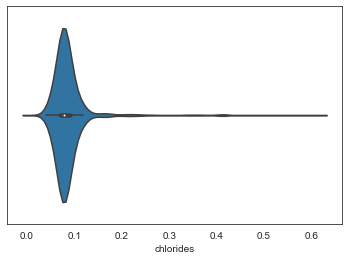

In [20]:
sns.set_style('white')
sns.violinplot(x='chlorides',data=wine)

<AxesSubplot:xlabel='free sulfur dioxide'>

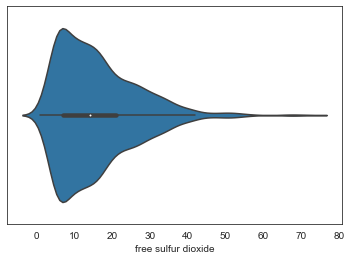

In [21]:
sns.set_style('white')
sns.violinplot(x='free sulfur dioxide',data=wine)

<AxesSubplot:xlabel='total sulfur dioxide'>

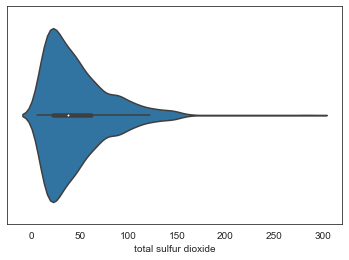

In [22]:
sns.set_style('white')
sns.violinplot(x='total sulfur dioxide',data=wine)

<AxesSubplot:xlabel='density'>

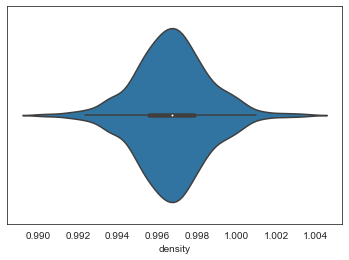

In [23]:
sns.set_style('white')
sns.violinplot(x='density',data=wine)

<AxesSubplot:xlabel='pH'>

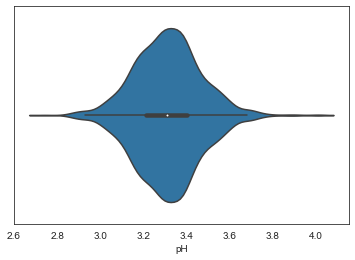

In [24]:
sns.set_style('white')
sns.violinplot(x='pH',data=wine)

<AxesSubplot:xlabel='sulphates'>

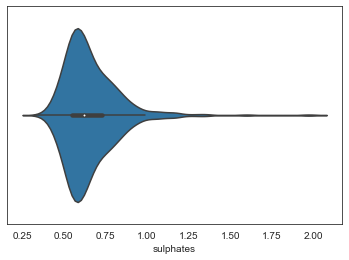

In [25]:
sns.set_style('white')
sns.violinplot(x='sulphates',data=wine)

<AxesSubplot:xlabel='alcohol'>

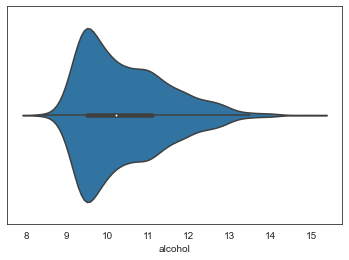

In [26]:
sns.set_style('white')
sns.violinplot(x='alcohol',data=wine)

<AxesSubplot:xlabel='quality'>

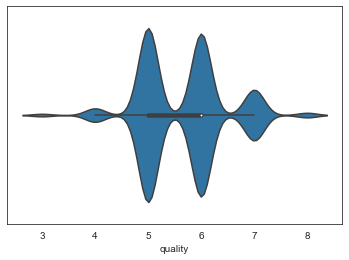

In [27]:
sns.set_style('white')
sns.violinplot(x='quality',data=wine)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

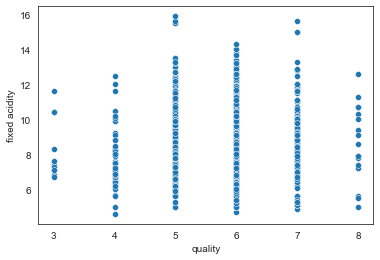

In [28]:
sns.scatterplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

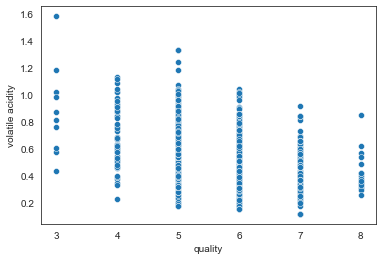

In [30]:
sns.scatterplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

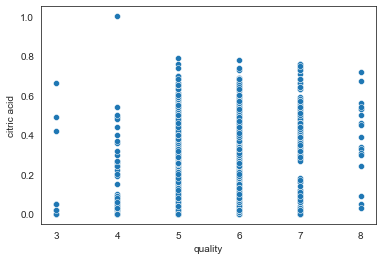

In [31]:
sns.scatterplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

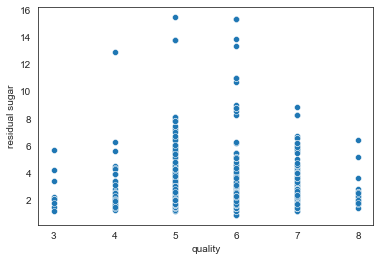

In [32]:
sns.scatterplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

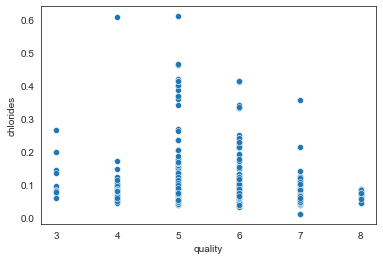

In [33]:
sns.scatterplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

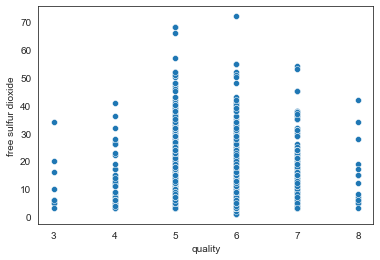

In [34]:
sns.scatterplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

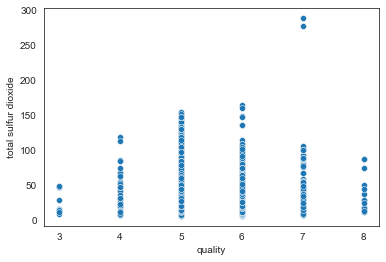

In [35]:
sns.scatterplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

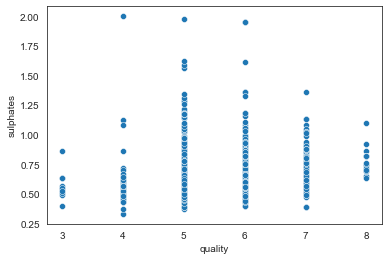

In [36]:
sns.scatterplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

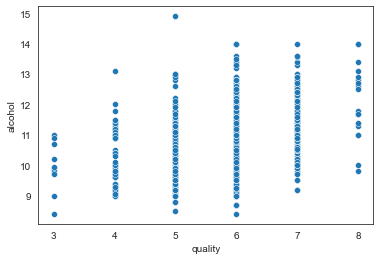

In [37]:
sns.scatterplot(x = 'quality', y = 'alcohol', data = wine)

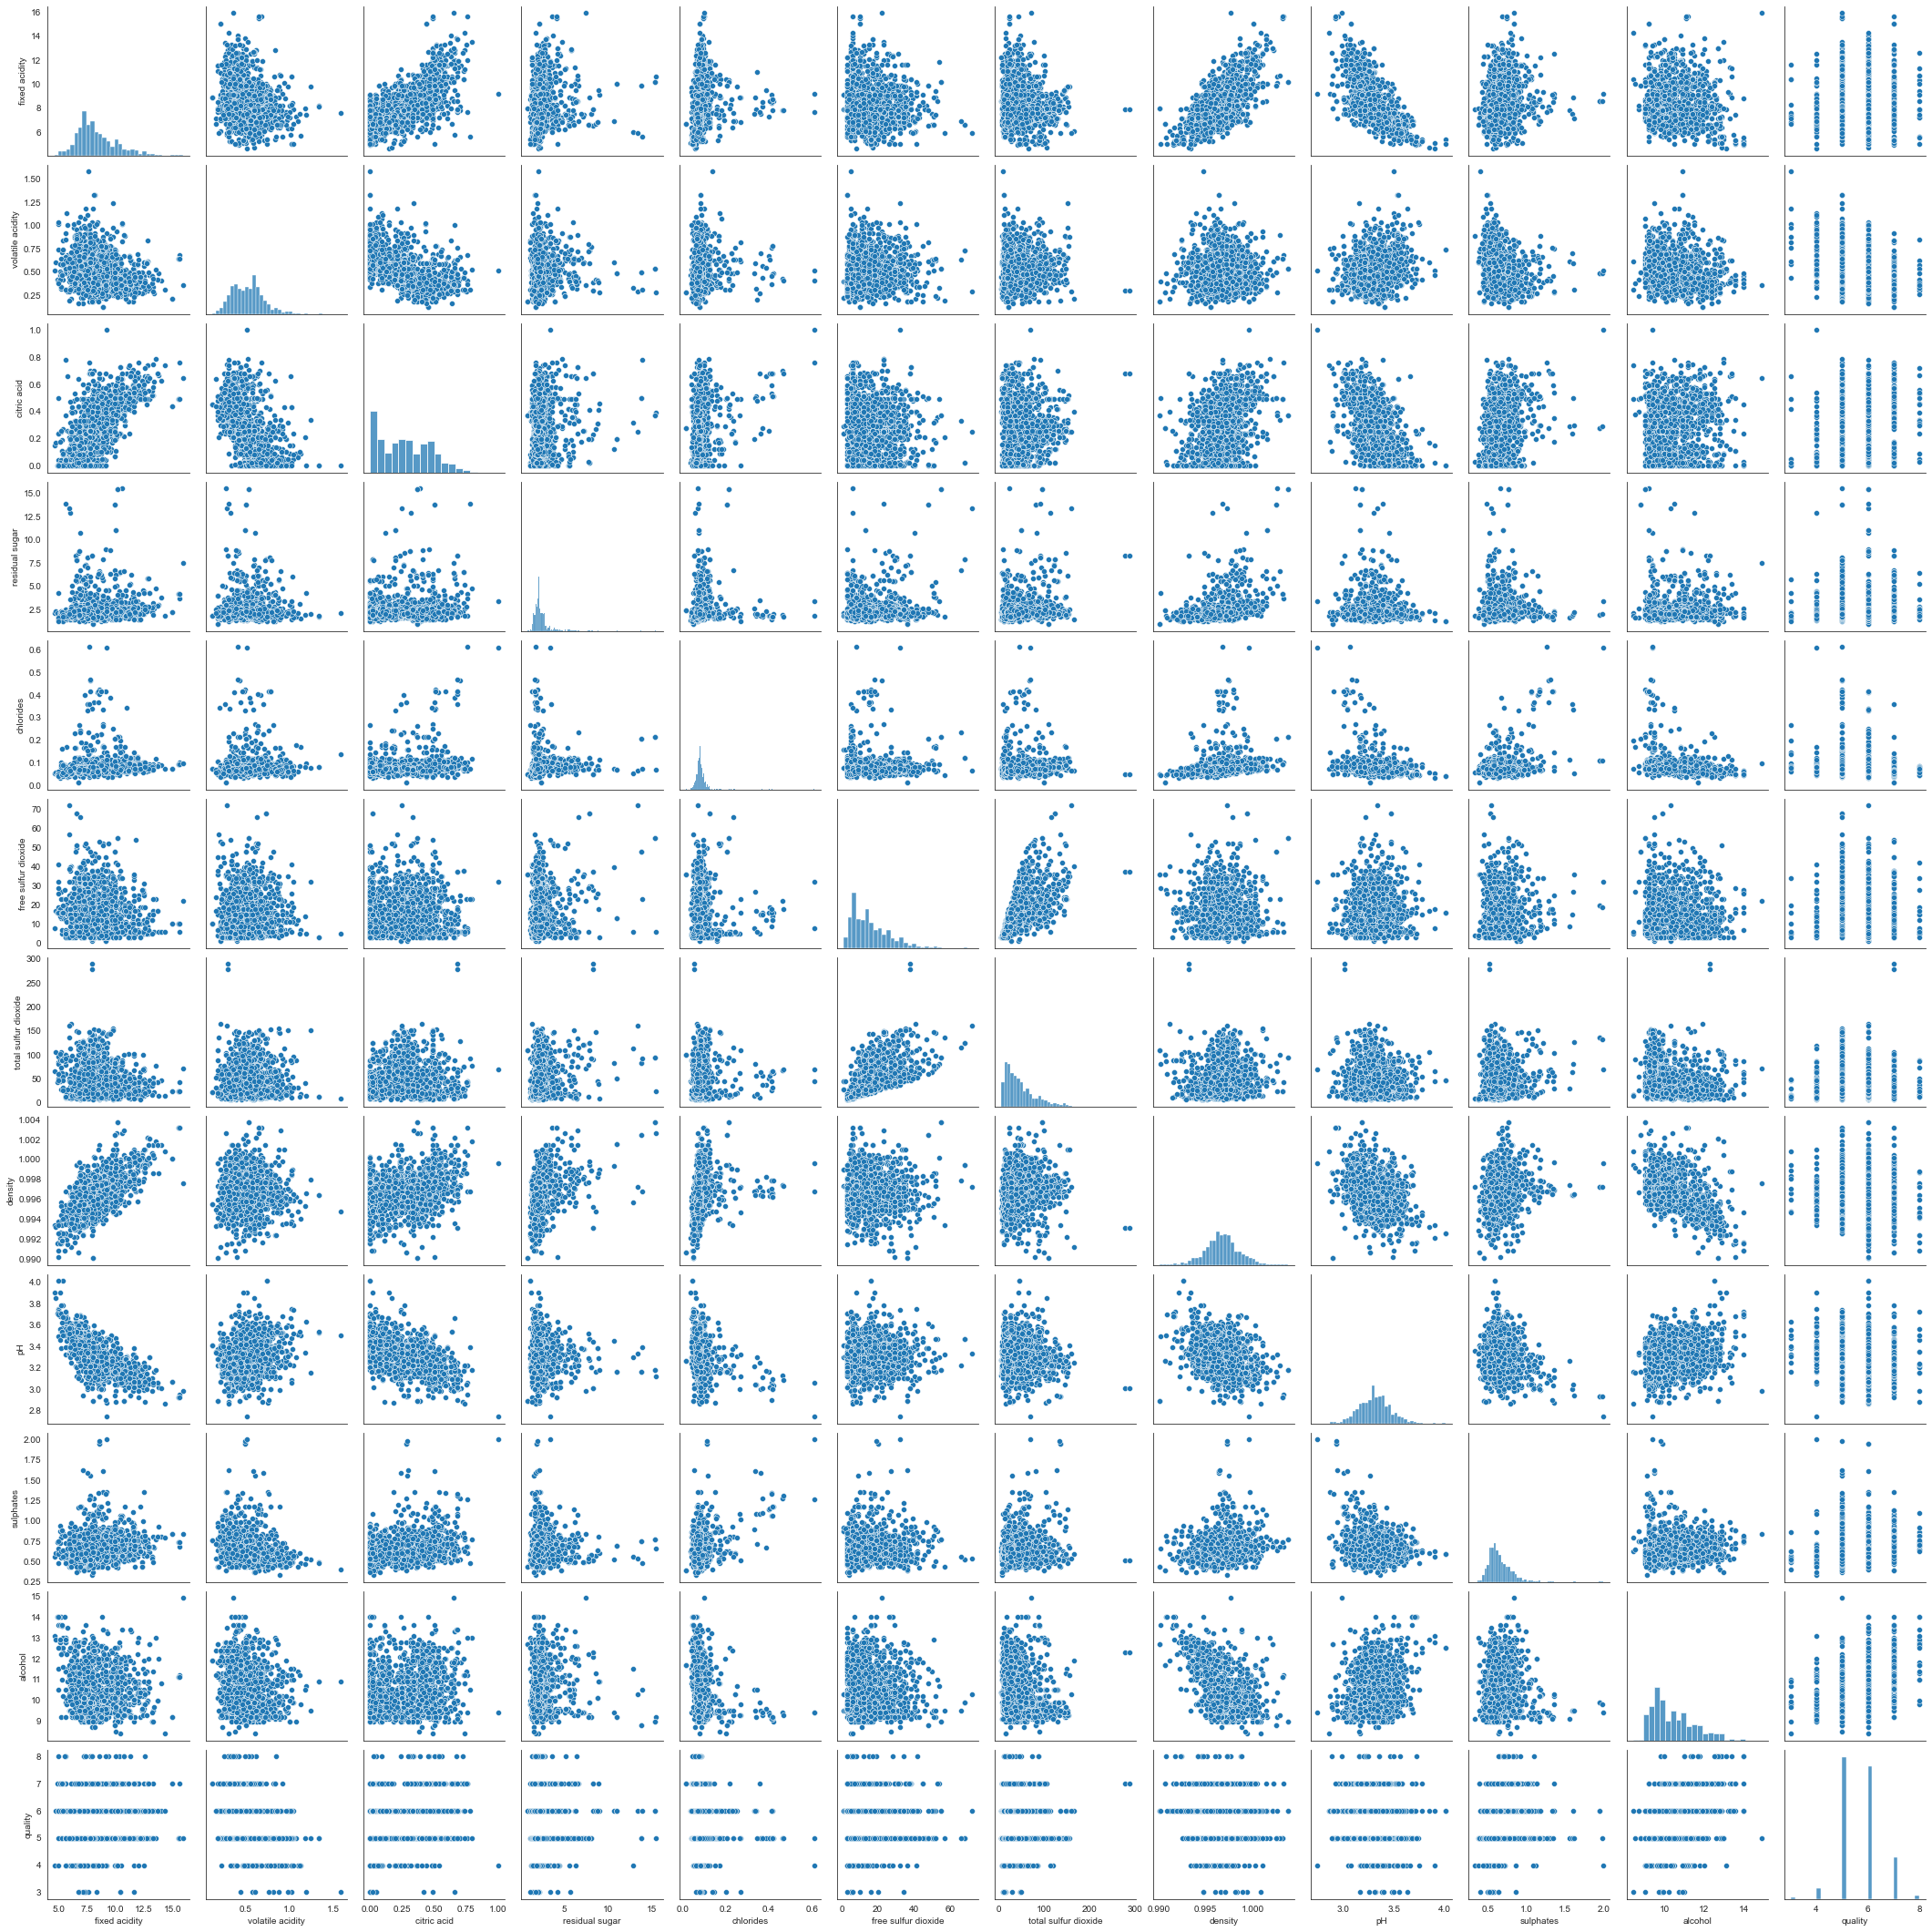

In [38]:
sns.pairplot(wine)

# corrolation

In [39]:
corr=wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


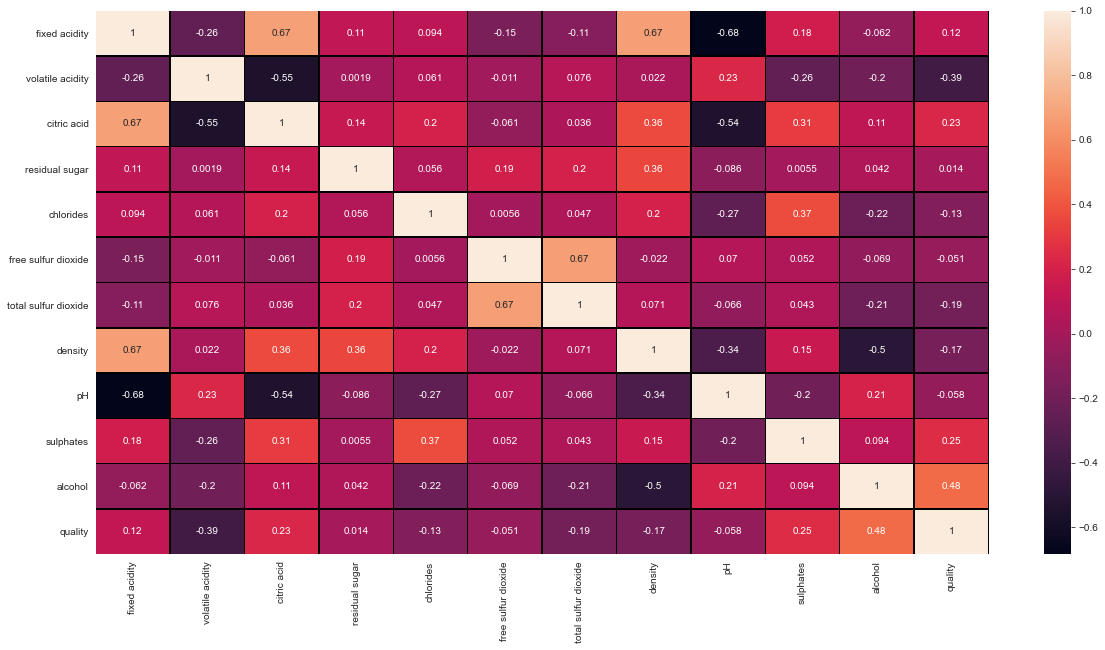

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

# describing dataset

In [41]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking skewness

In [42]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


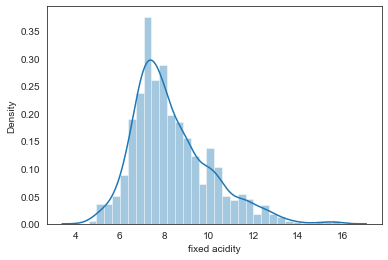

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


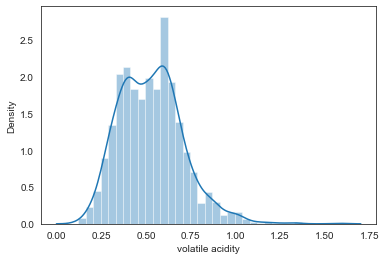

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


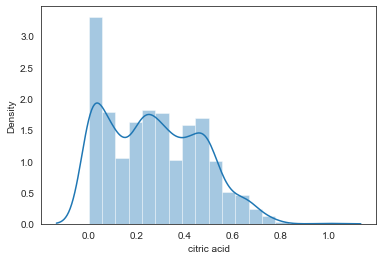

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


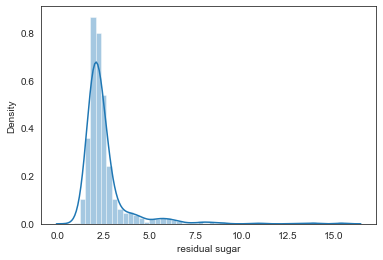

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


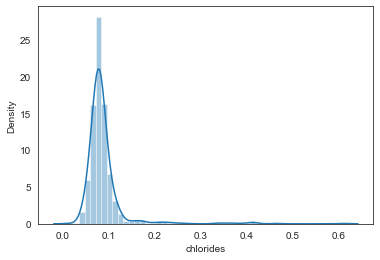

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


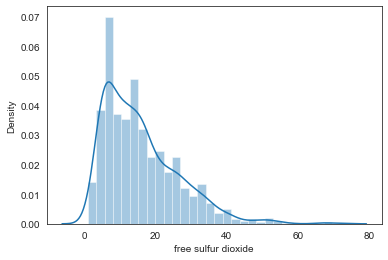

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


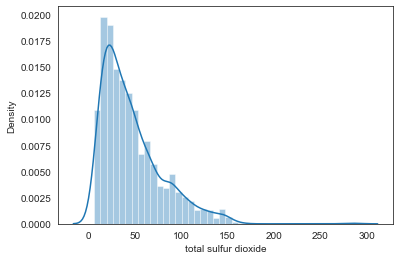

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


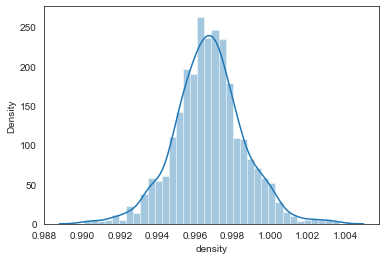

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


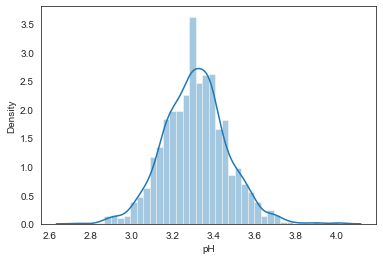

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


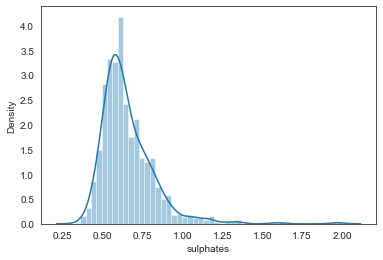

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


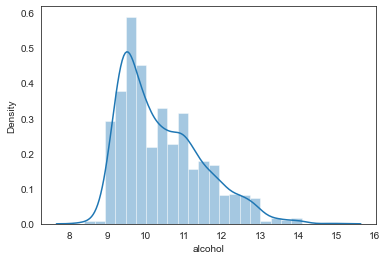

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


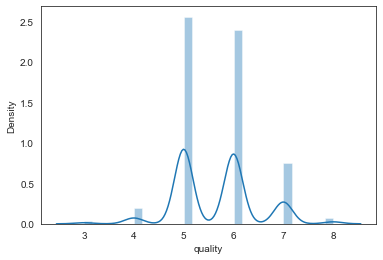

In [44]:
for i in wine.describe().columns:
    sns.distplot(wine[i])
    plt.show()

# Data Preprocessing

In [45]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [46]:
label_quality = LabelEncoder()

In [47]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [48]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

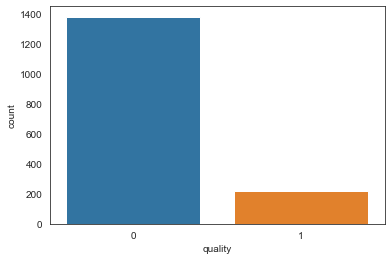

In [49]:
sns.countplot(wine['quality'])

In [50]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
sc = StandardScaler()

In [53]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Classifier

In [54]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [55]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.67      0.43      0.52        47

    accuracy                           0.88       320
   macro avg       0.79      0.69      0.73       320
weighted avg       0.87      0.88      0.87       320



In [56]:
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 27  20]]


# Stochastic Gradient Decent Classifier

In [57]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [58]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       273
           1       0.57      0.09      0.15        47

    accuracy                           0.86       320
   macro avg       0.72      0.54      0.53       320
weighted avg       0.82      0.86      0.81       320



In [59]:
print(confusion_matrix(y_test, pred_sgd))

[[270   3]
 [ 43   4]]


# Support Vector Classifier

In [60]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [61]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



# Grid Search CV

In [62]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [63]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [64]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [65]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



# Cross Validation Score for random forest and SGD

In [66]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9101070374015748

# checking outliers

<AxesSubplot:>

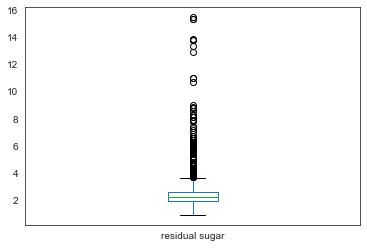

In [67]:
wine['residual sugar'].plot.box()

<AxesSubplot:>

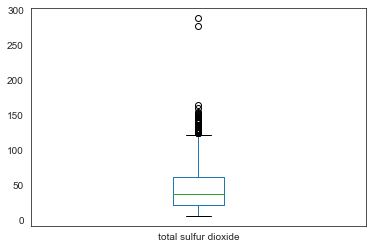

In [68]:
wine['total sulfur dioxide'].plot.box()

<AxesSubplot:>

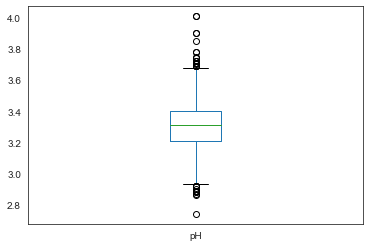

In [69]:
wine['pH'].plot.box()

<AxesSubplot:>

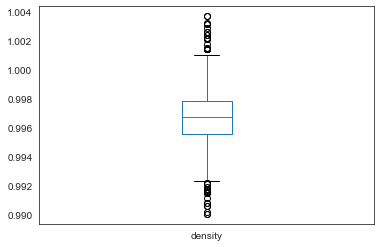

In [70]:
wine['density'].plot.box()

# Handling outliers using z-score

In [71]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(wine))   
threshold=3    
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [72]:
wine_new=wine[(z<3).all(axis=1)]
wine_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [73]:
wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [74]:
wine.shape

(1599, 12)

In [75]:
wine_new.shape

(1458, 12)

# Preparing dataset for model training

In [79]:
x=wine_new.drop('residual sugar',axis=1) 
y=wine_new['residual sugar'] 

In [80]:
x.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [81]:
y

0       1.9
1       2.6
2       2.3
3       1.9
4       1.9
       ... 
1594    2.0
1595    2.2
1596    2.3
1597    2.0
1598    3.6
Name: residual sugar, Length: 1458, dtype: float64

# Scaling the model

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.55404532,  1.0387081 , -1.38741253, ..., -0.63538217,
        -0.99657302, -0.39988065],
       [-0.31118983,  2.10132549, -1.38741253, ...,  0.2897715 ,
        -0.60491468, -0.39988065],
       [-0.31118983,  1.39291389, -1.17821377, ...,  0.05848308,
        -0.60491468, -0.39988065],
       ...,
       [-1.22189791, -0.0829436 , -0.70751654, ...,  0.82944447,
         0.57006031, -0.39988065],
       [-1.4647534 ,  0.71401945, -0.75981623, ...,  0.52105991,
        -0.21325635, -0.39988065],
       [-1.40403953, -1.26362959,  1.07067297, ...,  0.13557922,
         0.57006031, -0.39988065]])

# Building the model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [84]:
best_rstate=0
accuracy=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=935,test_size=.20)

# Finding the best model

In [86]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)

Accuracy:  36.34222160927499
Cross Validation score:  39.35971790616679
Difference:  -3.0174962968917973


In [88]:
print('For Linear Regression: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Linear Regression: 

Mean Squared Error:  0.5817271529293645
Root Mean Squared Error:  0.7627103991223435


# Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)
print('For Random Forest Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy:  58.53619526692682
Cross Validation score:  44.58102112044976
Difference:  13.955174146477056
For Random Forest Regressor: 

Mean Squared Error:  0.37891082106164375
Root Mean Squared Error:  0.6155573255689869


# Support Vector Regressor

In [90]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SVR(),x_train,y_train,cv=5).mean()
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)
print('For Support Vector Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy:  36.22752817240278
Cross Validation score:  34.10787401734392
Difference:  2.119654155058859
For Support Vector Regressor: 

Mean Squared Error:  0.5827752618671574
Root Mean Squared Error:  0.7633971848698143


# Gradient Boosting Regressor

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): 
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('Accuracy correponding to best random state',final_r_state,'is',max_r_score*100)
    return final_r_state

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [93]:
gbr=GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 100)
r_state=maxr2_score(gbr,x,y)


Accuracy correponding to best random state 52 is 55.61771959928428


In [94]:
cvscore=cross_val_score(gbr,x_train,y_train,cv=5).mean()
print('Cross Validation score: ',cvscore*100)
print('For Gradient Boosting Regressor: \n')
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Cross Validation score:  39.31330674251481
For Gradient Boosting Regressor: 

Mean Squared Error:  0.5827752618671574
Root Mean Squared Error:  0.7633971848698143


# Regularization using Lasso

In [95]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)

In [97]:
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv: ',j)
    print('Cross validation score is: ',lsc*100)
    print('r2_score is: ',lss*100)
    print('\n')

At cv:  2
Cross validation score is:  -8.847644371451036
r2_score is:  -0.11190183748526206


At cv:  3
Cross validation score is:  -3.257336760031304
r2_score is:  -0.11190183748526206


At cv:  4
Cross validation score is:  -5.148012187660223
r2_score is:  -0.11190183748526206


At cv:  5
Cross validation score is:  -4.727973472993421
r2_score is:  -0.11190183748526206


At cv:  6
Cross validation score is:  -4.809611467009489
r2_score is:  -0.11190183748526206


At cv:  7
Cross validation score is:  -5.509095950130326
r2_score is:  -0.11190183748526206


At cv:  8
Cross validation score is:  -5.501166576217625
r2_score is:  -0.11190183748526206


At cv:  9
Cross validation score is:  -3.9593808026074386
r2_score is:  -0.11190183748526206




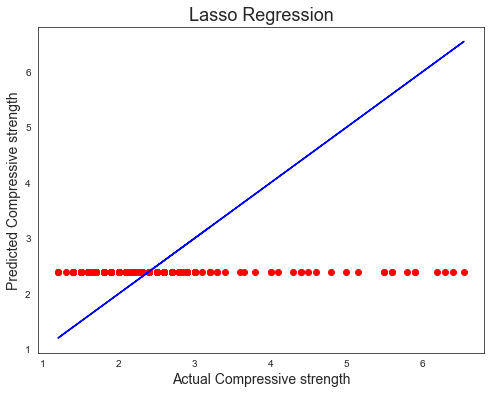

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Lasso Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

# Calculating MAE,MSE and RMSE for Lasso

In [99]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [100]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Mean Absolute Error:  0.5941613407269908
Mean Squared Error:  0.8849663341188704
Root Mean Squared Error:  0.9407264927272275


# Saving the Model

In [104]:
!pip install joblib
import joblib

In [105]:
joblib.dump(clf, 'red_wine.pkl')

['red_wine.pkl']